# Multiple pendulum plots: Section 12.3

Use Pendulum class to generate basic pendulum plots.  Applied here to examples from Taylor Section 12.3.

* Last revised 21-Jan-2019 by Dick Furnstahl (furnstahl.1@osu.edu).

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.integrate import odeint

import matplotlib.pyplot as plt

## Pendulum class and utility functions

In [3]:
class Pendulum():
    """
    Pendulum class implements the parameters and differential equation for 
     a pendulum using the notation from Taylor.
     
    Parameters
    ----------
    omega_0 : float
        natural frequency of the pendulum (\sqrt{g/l} where l is the 
        pendulum length) 
    beta : float
        coefficient of friction 
    gamma_ext : float
        amplitude of external force is gamma * omega_0**2 
    omega_ext : float
        frequency of external force 
    phi_ext : float
        phase angle for external force 

    Methods
    -------
    dy_dt(y, t)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    driving_force(t) 
        Returns the value of the external driving force at time t.
    """
    def __init__(self, omega_0=1., beta=0.2,
                 gamma_ext=0.2, omega_ext=0.689, phi_ext=0.
                ):
        self.omega_0 = omega_0
        self.beta = beta
        self.gamma_ext = gamma_ext
        self.omega_ext = omega_ext
        self.phi_ext = phi_ext
    
    def dy_dt(self, y, t):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi/dt d^2phi/dt^2]
        
        Parameters
        ----------
        y : float
            A 2-component vector with y[0] = phi(t) and y[1] = dphi/dt
        t : float
            time 
            
        Returns
        -------
        
        """
        F_ext = self.driving_force(t)
        return [y[1], -self.omega_0**2 * np.sin(y[0]) - 2.*self.beta * y[1] \
                       + F_ext]
    
    def driving_force(self, t):
        """
        This function returns the value of the driving force at time t.
        """
        return self.gamma_ext * self.omega_0**2 \
                              * np.cos(self.omega_ext*t + self.phi_ext)  
    
    def solve_ode(self, phi_0, phi_dot_0, abserr=1.0e-8, relerr=1.0e-6):
        """
        Solve the ODE given initial conditions.
        For now use odeint, but we have the option to switch.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi_0, phi_dot_0]  
        phi, phi_dot = odeint(self.dy_dt, y, t_pts, 
                              atol=abserr, rtol=relerr).T
        return phi, phi_dot

In [4]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [5]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    """Given an array (e.g., of times) and desired starting and stop values,
        return the array indices that are closest to those values.
    """
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Make plots for Taylor Figure 12.2

We'll set it up with the specified parameters.

In [6]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 100.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Common pendulum parameters
gamma_ext = 0.2
omega_ext = 2.*np.pi
phi_ext = 0.

omega_0 = 1.5*omega_ext
beta = omega_0/4.

# Instantiate a pendulum 
p1 = Pendulum(omega_0=omega_0, beta=beta, 
              gamma_ext=gamma_ext, omega_ext=omega_ext, phi_ext=phi_ext)

# calculate the driving force for t_pts
driving = p1.driving_force(t_pts)


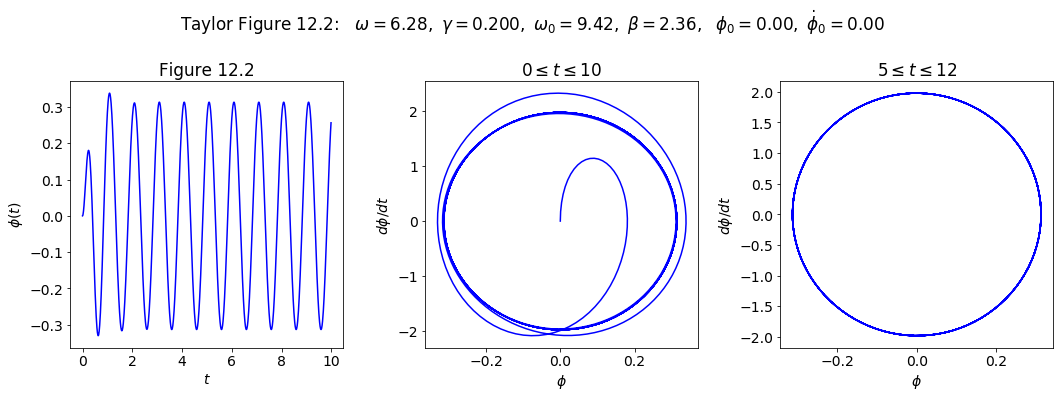

In [7]:
# initial conditions specified
phi_0 = 0.
phi_dot_0 = 0.0
phi, phi_dot = p1.solve_ode(phi_0, phi_dot_0)

# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Taylor Figure 12.2:  ' + \
                rf' $\omega = {omega_ext:.2f},$' + \
                rf' $\gamma = {gamma_ext:.3f},$' + \
                rf' $\omega_0 = {omega_0:.2f},$' + \
                rf' $\beta = {beta:.2f},$' + \
                rf'  $\phi_0 = {phi_0:.2f},$' + \
                rf' $\dot\phi_0 = {phi_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: plot from t=0 to t=10   
ax_a = fig.add_subplot(1,3,1)                  

start, stop = start_stop_indices(t_pts, 0., 10.)    
plot_y_vs_x(t_pts[start : stop], phi[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title='Figure 12.2', 
            ax=ax_a)    
                              
# second plot: state space plot from t=0 to t=10   
ax_b = fig.add_subplot(1,3,2)                  

start, stop = start_stop_indices(t_pts, 0., 10.)    
plot_y_vs_x(phi[start : stop], phi_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$0 \leq t \leq 10$', 
            ax=ax_b)    

# third plot: state space plot from t=5 to t=12   
ax_c = fig.add_subplot(1,3,3)                  

start, stop = start_stop_indices(t_pts, 5., 12.)    
plot_y_vs_x(phi[start : stop], phi_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$5 \leq t \leq 12$', 
            ax=ax_c)    

fig.tight_layout()
fig.savefig('Figure_12.2.png', bbox_inches='tight')  # always bbox_inches='tight'

Now trying the power spectrum in steady state, plotting only positive frequencies and cutting off any lower peaks from noise.  We multiply the frequencies by $2\pi$ to get the angular frequency.  **What do you observe?**

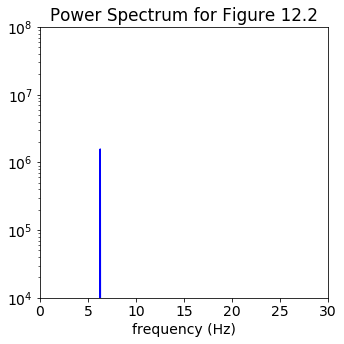

In [8]:
start, stop = start_stop_indices(t_pts, 20., t_end)    
signal = phi[start:stop]
power_spectrum = np.abs(np.fft.fft(signal))**2
freqs = 2.*np.pi * np.fft.fftfreq(signal.size, delta_t)
idx = np.argsort(freqs)

fig_ps = plt.figure(figsize=(5,5))
ax_ps = fig_ps.add_subplot(1,1,1)
ax_ps.semilogy(freqs[idx], power_spectrum[idx], color='blue')
ax_ps.set_xlim(0, 30.)
ax_ps.set_ylim(1.e4, 1.e8)
ax_ps.set_xlabel('frequency (Hz)')
ax_ps.set_title('Power Spectrum for Figure 12.2')

fig_ps.tight_layout()


## Sections 12.1 $--$ 12.3 Q1: Pick conditions and then analyze

In [9]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 100.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Common pendulum parameters
gamma_ext = 0.01   # weak driving
omega_ext = 2.*np.pi
phi_ext = np.pi/2.  # come back to this later!

omega_0 = 1.5*omega_ext
beta = omega_0/10.  # weak damping

# Instantiate a pendulum 
p1 = Pendulum(omega_0=omega_0, beta=beta, 
              gamma_ext=gamma_ext, omega_ext=omega_ext, phi_ext=phi_ext)

# calculate the driving force for t_pts
driving = p1.driving_force(t_pts)


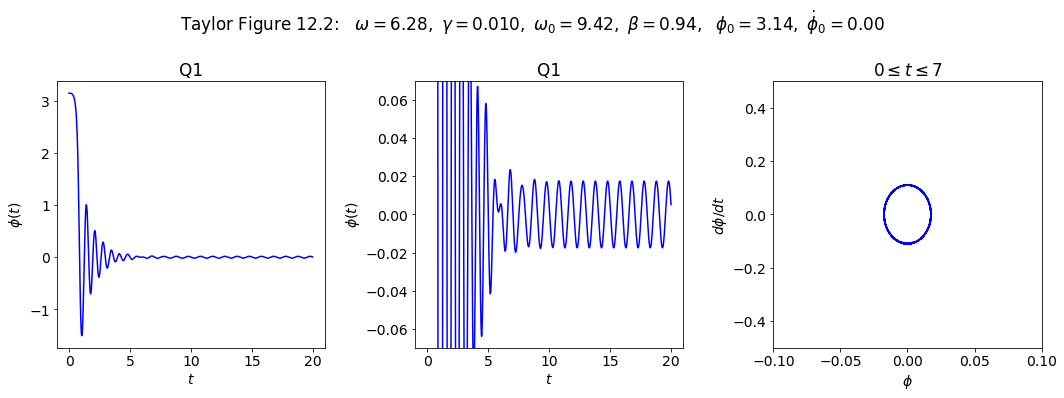

In [10]:
# initial conditions specified
phi_0 = np.pi    # at the top
phi_dot_0 = 0.0  # motionless
phi, phi_dot = p1.solve_ode(phi_0, phi_dot_0)

# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Taylor Figure 12.2:  ' + \
                rf' $\omega = {omega_ext:.2f},$' + \
                rf' $\gamma = {gamma_ext:.3f},$' + \
                rf' $\omega_0 = {omega_0:.2f},$' + \
                rf' $\beta = {beta:.2f},$' + \
                rf'  $\phi_0 = {phi_0:.2f},$' + \
                rf' $\dot\phi_0 = {phi_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: plot from t=0 to t=20   
ax_a = fig.add_subplot(1,3,1)                  

start, stop = start_stop_indices(t_pts, 0., 20.)    
plot_y_vs_x(t_pts[start : stop], phi[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title='Q1', 
            ax=ax_a)    
                              
# second plot: same as first but scaled up
ax_b = fig.add_subplot(1,3,2)                  

start, stop = start_stop_indices(t_pts, 0., 20.)    
plot_y_vs_x(t_pts[start : stop], phi[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title='Q1', 
            ax=ax_b)    
ax_b.set_ylim(-0.07, 0.07)

# third plot: state space plot from t=0 to t=7  
ax_c = fig.add_subplot(1,3,3)                  

start, stop = start_stop_indices(t_pts, 10., 20.)    
plot_y_vs_x(phi[start : stop], phi_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$0 \leq t \leq 7$', 
            ax=ax_c)    
ax_c.set_xlim(-.1, .1)
ax_c.set_ylim(-.5, .5)

fig.tight_layout()
fig.savefig('Section_12.3_Q1.png', bbox_inches='tight')  # always bbox_inches='tight'

**Now go back and predict what the state space plot will look like if we skip the transient region.**

Now trying the power spectrum in steady state, plotting only positive frequencies and cutting off any lower peaks from noise.  We multiply the frequencies by $2\pi$ to get the angular frequency.  **What do you observe?**

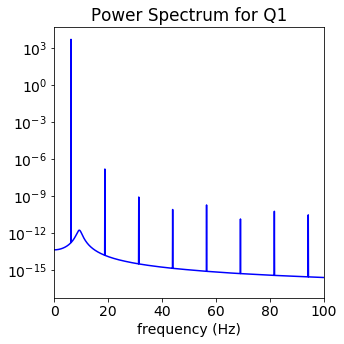

In [11]:
start, stop = start_stop_indices(t_pts, 20., t_end)    
signal = phi[start:stop]
power_spectrum = np.abs(np.fft.fft(signal))**2
freqs = 2.*np.pi * np.fft.fftfreq(signal.size, delta_t)
idx = np.argsort(freqs)

fig_ps = plt.figure(figsize=(5,5))
ax_ps = fig_ps.add_subplot(1,1,1)
ax_ps.semilogy(freqs[idx], power_spectrum[idx], color='blue')
ax_ps.set_xlim(0, 100.)
#ax_ps.set_ylim(1.e4, 1.e8)
ax_ps.set_xlabel('frequency (Hz)')
ax_ps.set_title('Power Spectrum for Q1')

fig_ps.tight_layout()


## Make plots for Taylor Figure 12.3

Just change $\gamma$ from 0.2 to 0.9 compared to Figure 12.2.

In [12]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 100.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Common pendulum parameters
gamma_ext = 0.9
omega_ext = 2.*np.pi
phi_ext = 0.

omega_0 = 1.5*omega_ext
beta = omega_0/4.

# Instantiate a pendulum 
p1 = Pendulum(omega_0=omega_0, beta=beta, 
              gamma_ext=gamma_ext, omega_ext=omega_ext, phi_ext=phi_ext)

# calculate the driving force for t_pts
driving = p1.driving_force(t_pts)


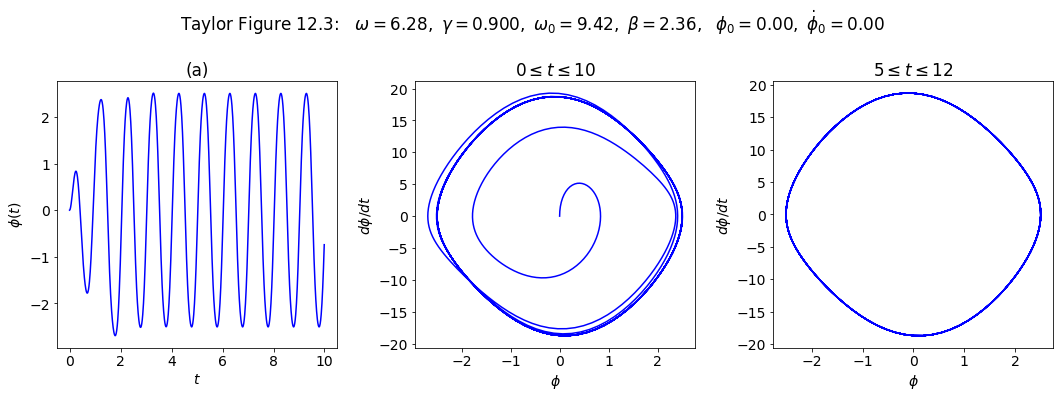

In [13]:
# initial conditions specified
phi_0 = 0.
phi_dot_0 = 0.0
phi, phi_dot = p1.solve_ode(phi_0, phi_dot_0)

# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Taylor Figure 12.3:  ' + \
                rf' $\omega = {omega_ext:.2f},$' + \
                rf' $\gamma = {gamma_ext:.3f},$' + \
                rf' $\omega_0 = {omega_0:.2f},$' + \
                rf' $\beta = {beta:.2f},$' + \
                rf'  $\phi_0 = {phi_0:.2f},$' + \
                rf' $\dot\phi_0 = {phi_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: plot from t=0 to t=10   
ax_a = fig.add_subplot(1,3,1)                  

start, stop = start_stop_indices(t_pts, 0., 10.)    
plot_y_vs_x(t_pts[start : stop], phi[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title='(a)', 
            ax=ax_a)    
                              
# second plot: state space plot from t=0 to t=10   
ax_b = fig.add_subplot(1,3,2)                  

start, stop = start_stop_indices(t_pts, 0., 10.)    
plot_y_vs_x(phi[start : stop], phi_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$0 \leq t \leq 10$', 
            ax=ax_b)    

# third plot: state space plot from t=5 to t=12   
ax_c = fig.add_subplot(1,3,3)                  

start, stop = start_stop_indices(t_pts, 5., 12.)    
plot_y_vs_x(phi[start : stop], phi_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$5 \leq t \leq 12$', 
            ax=ax_c)    

fig.tight_layout()
fig.savefig('Figure_12.3.png', bbox_inches='tight')  # always bbox_inches='tight'

Now trying the power spectrum in steady state, plotting only positive frequencies and cutting off any lower peaks from noise.  We multiply the frequencies by $2\pi$ to get the angular frequency.  **What do you observe?**

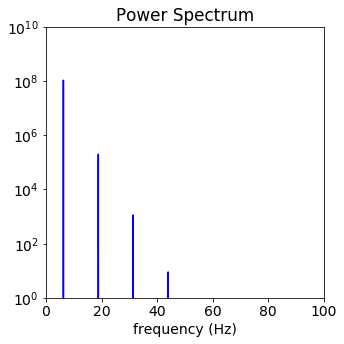

In [14]:
start, stop = start_stop_indices(t_pts, 20., t_end)    
signal = phi[start:stop]
power_spectrum = np.abs(np.fft.fft(signal))**2
freqs = 2.*np.pi * np.fft.fftfreq(signal.size, delta_t)
idx = np.argsort(freqs)

fig_ps = plt.figure(figsize=(5,5))
ax_ps = fig_ps.add_subplot(1,1,1)
ax_ps.semilogy(freqs[idx], power_spectrum[idx], color='blue')
ax_ps.set_xlim(0, 100.)
ax_ps.set_ylim(1.e0, 1.e10)
ax_ps.set_xlabel('frequency (Hz)')
ax_ps.set_title('Power Spectrum')

fig_ps.tight_layout()
